# Introduction 

This Jupyter Notebook contains analysis of Coursera Courses dataset. Herein the notebook will provide and describe steps of data cleaning, exploratory data analysis, visualizations, some comparisons and finalise with giving improvements to be done.

In [1]:
# Importing libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import itertools
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

# Loading Coursera data

In [2]:
# Importing the coursera data

coursera_data = pd.read_csv('./coursea_data.csv', sep=',', index_col=0)
coursera_data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


# Data cleaning

### Checking if any row of a feature is null?
<p> In the below cells we are investigating if any value in the rows of features (any()) at a dataframe is null (isnull()) and how many such valeus there are. </p>
<p> In the first output cell we expect a boolean value to be False if there are no null values for the columns, otherwise if there is at least one null value - True.</p>
<p> In the second output cell the value should be 0 if there are no null values, otherwise an integer value (1 or more). </p>
<p> In the third and fourth output cells we look at the most important values ('SPECIALIZATION', 'COURSE', 'PROFESSIONAL CERTIFICATE' & 'Beginner', 'Intermediate', 'Mixed', 'Advanced') to be visualized and anlyused. </p>

In [3]:
coursera_data.isnull().any()

course_title                False
course_organization         False
course_Certificate_type     False
course_rating               False
course_difficulty           False
course_students_enrolled    False
dtype: bool

In [4]:
coursera_data.isnull().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [5]:
# Heatmap of null values:
# sns.heatmap(coursera_data.isnull(),cbar=False, yticklabels=False, cmap = 'viridis');
# Output: purple as no null values identified.

In [6]:
coursera_data['course_Certificate_type'].unique()

array(['SPECIALIZATION', 'COURSE', 'PROFESSIONAL CERTIFICATE'],
      dtype=object)

In [7]:
coursera_data['course_difficulty'].unique()

array(['Beginner', 'Intermediate', 'Mixed', 'Advanced'], dtype=object)

### Checking if there are any duplicates?
<p> In the below cell we are checking if a row across all features in a dataframe contains duplicate values. </p>
<p> In the first output we expect a boolean value to be False if there are no duplicated rows. </p>
<p> In the second output cell we expect it to return 0 to specify zero duplicated values. </p>

In [8]:
coursera_data.duplicated(coursera_data.columns)

134    False
743    False
874    False
413    False
635    False
       ...  
236    False
883    False
545    False
875    False
163    False
Length: 891, dtype: bool

In [9]:
coursera_data.duplicated(coursera_data.columns).sum()

0

# Exploratory Data Analysis

<p> In the cell below we are sorting indexes and changing index values to start from 1 as well as change its column name to 'Index'. Then printing the output. </p> 

In [10]:
coursera_data.sort_index(axis=0, inplace=True)
coursera_data
coursera_data.index += 1
coursera_data.index.name = 'Index'
coursera_data.head(5)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
Index,,,,,,
1,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
2,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
3,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
4,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
5,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k


### How many observations and features there are?
<p> In the below cell we are counting row numbers of index as observations and column numbers as features. </p>
<p> In the output cell we are displaying the number of rows (891) and columns (6). There are 891 observations and 6 features. </p>

In [11]:
print("Observations: " + str(len(coursera_data.index)))
print("Features: " + str(len(coursera_data.columns)))
# coursera_data.shape

Observations: 891
Features: 6


### Data Pre-processing
<p> As we saw when we inspected the first few values of data above, the column 'course_students_enrolled' is of the type object even though it should be float. That is due to the "k" or "m" after the number. </p>
<p> Thus we need to deal with that before starting any analysis and design a function to change the values to floats. </p>

In [12]:
def value_to_float(x: float) -> float:
    """ A function to convert value to a float """
    if type(x) == float:
        return x
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
        return 1000.0
    if 'm' in x:
        if len(x) > 1:
            return float(x.replace('m', '')) * 1000000
        return 1000000.0
    if 'b' in x:
        return float(x.replace('m', '')) * 1000000000
    return 0.0

coursera_data['course_students_enrolled'] = coursera_data['course_students_enrolled'].apply(value_to_float)

In [13]:
coursera_data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
Index,,,,,,
1,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000.0
2,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000.0
3,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0
4,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0
5,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350000.0


### Which of the features are numeric?
<p> In the cell below we are defining all columns and implementing function (_get_numeric_data()) to find numeric features. </p>  
<p> In the output cell we are getting these numeric features: 'course_rating', 'course_students_enrolled'. </p> 

In [14]:
cols = coursera_data.columns
num_cols = coursera_data._get_numeric_data().columns
num_cols

# df.info()

Index(['course_rating', 'course_students_enrolled'], dtype='object')

### Which features are categorical?
<p> In the cell below we are substracting numeric features from all columns, so in the output we get categorical features: 'course_Certificate_type', 'course_difficulty', 'course_organization', 'course_title'. </p> 

In [15]:
cat_cols = list(set(cols) - set(num_cols))
cat_cols

# df.dtypes.value_counts()

['course_title',
 'course_Certificate_type',
 'course_difficulty',
 'course_organization']

<em> <p> All categorical features will come in handy when visualizing the data. </p> </em>

## Treating outliers
<p> In the below four cells we are writing commands to treat the outliers and plotting them. The dots in the graphs below show the outliers. </p>

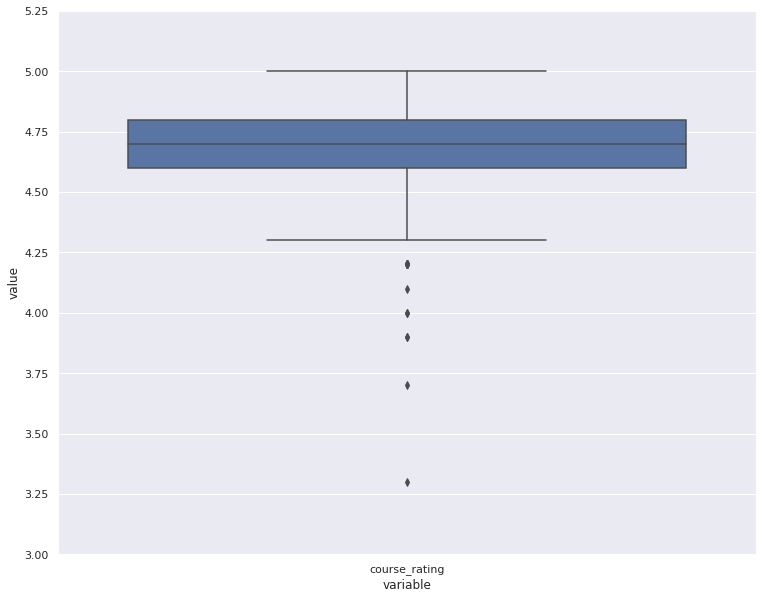

In [16]:
# Assigning a new dataframe (df_2) from a known dataframe (coursera_data) with 1 features ranging from 0 to 5
%matplotlib inline

df_2 = pd.DataFrame(data = coursera_data, columns = ['course_rating'])

# Setting the dimensions and overwriting the default values

sns.set(rc={'figure.figsize':(12.5,10.0)})

# Selecting boxplot for visualization 

sns.boxplot(x="variable", y="value", data=pd.melt(df_2))

# Plotting outliers within one features ranging from 0 to 5 

plt.style.use('classic')

plt.show()

# Expected result: outlier identifications

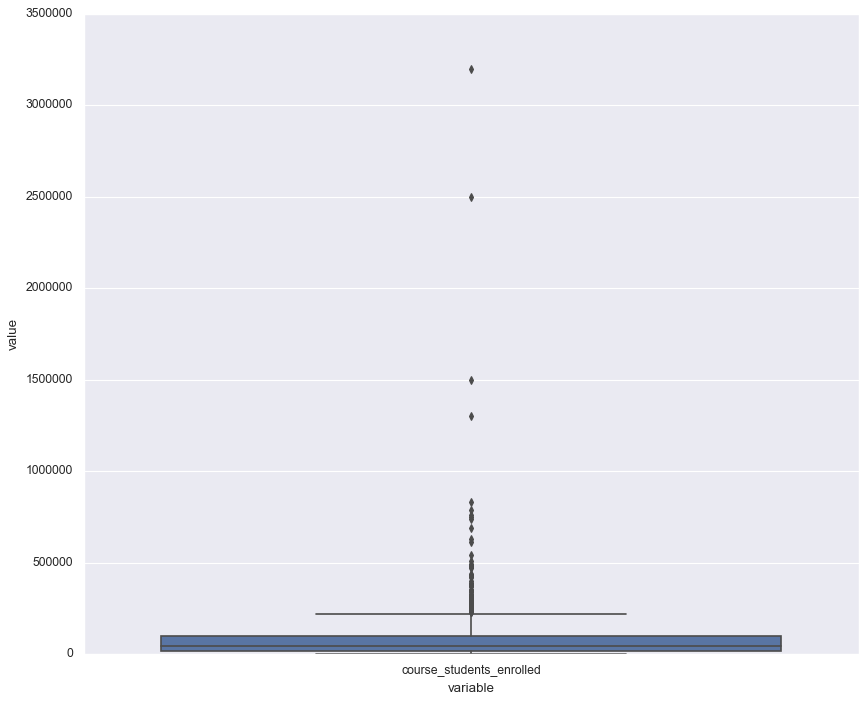

In [17]:
# Assigning a new dataframe (df_3) from a known dataframe (coursera_data) with 1 features ranging from 0 to 1 million

df_3 = pd.DataFrame(data = coursera_data, columns = ['course_students_enrolled'])

# Setting the dimensions and overwriting the default values

sns.set(rc={'figure.figsize':(12.5,10.0)})

# Selecting boxplot for visualization 

sns.boxplot(x="variable", y="value", data=pd.melt(df_3))

# Plotting outliers within 2 features ranging from 0 to 1 million 

plt.show()

# Expected result: outlier identifications

<em> <p> From outlier identification little information can be taken out as mean of averages are high, while the mean count of students enrolled are near zero </p> </em>

### Statistics of numeric features
Investignating standard deviations, means, minimum value, maximum value, counts and percentiles of numeric features.

In [18]:
coursera_data.describe()

,course_rating,course_students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


### Which organization has the most number of courses?

Herein we check two things:
* First, which organisation has the most number of courses on Coursera. 
* Next, which organisations have more than 10 courses on Coursera.

<p> This is an analysis to show which organisations dominate on Coursera with function written to help determine them. </p>

In [19]:
def find_organisation_greater_than_ten(data: pd.DataFrame) -> pd.DataFrame:
    """Returns a dataframe with course_organization and number of courses more than 10"""
    dict = {}
    course_org = coursera_data['course_organization'].to_list()
    for org in course_org:
        if org in dict:
            dict[org] += 1
        else:
            dict[org] = 1
    orgs = []
    counts = []
    for key, value in dict.items():
        if value > 10:
            orgs.append(key)
            counts.append(value)
        else:
            continue
    course_organisation_greater_than_10 = pd.DataFrame({'course_organization':orgs, 'count':counts})
    course_organisation_greater_than_10.sort_values(by='count', ascending=False, inplace=True)
    return course_organisation_greater_than_10

# Alternative way:
# coursera_data['course_students_enrolled'] = coursera_data['course_students_enrolled'].str.replace('k','*1000')
# coursera_data['course_students_enrolled'] = coursera_data['course_students_enrolled'].str.replace('m','*1000000')
# coursera_data['course_students_enrolled'] = coursera_data['course_students_enrolled'].map(lambda x: eval(x))

In [20]:
coursera_data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
Index,,,,,,
1,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000.0
2,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000.0
3,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0
4,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0
5,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350000.0


## Visualizing the data

***The beginning of visualizations***
<p> First barh chart shows the organizations with more than 10 courses on Coursera. </p>

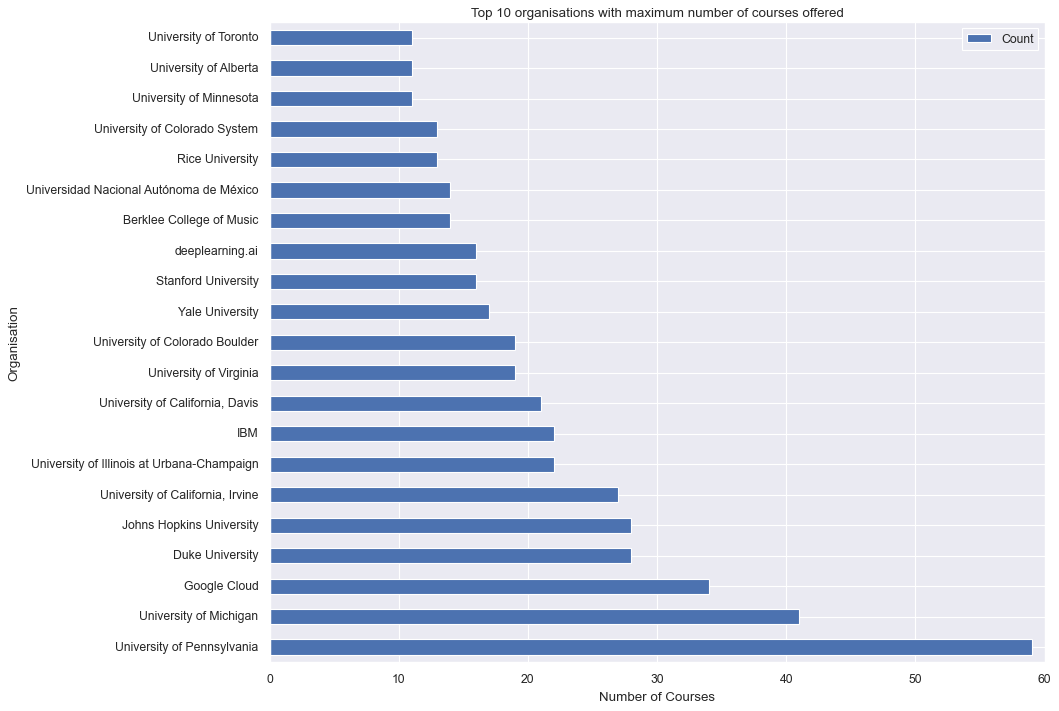

In [21]:
# Plotting a barh chart
course_organisation_greater_than_10 = find_organisation_greater_than_ten(coursera_data)
course_organisation_greater_than_10.plot(kind='barh', x='course_organization', y='count')
# plt.style.use('classic')
plt.title('Top 10 organisations with maximum number of courses offered')
plt.xlabel('Number of Courses')
plt.ylabel('Organisation')
plt.legend(['Count'], loc='upper right')
plt.show()

<em> University of Pennsylvania dominates with a bit shy of 60 courses, followed by University of Michigan who has just over 40 courses on Coursera!</em>

### Looking at the average course rating of the organisations with more than 10 courses
We investigate whether these organisations produce quality courses or is it just quantity over quality?

In [22]:
# dictionary containing organisation as key and avg rating as value
dominant_dict = round(coursera_data.groupby('course_organization')['course_rating'].mean(), 1).to_dict()

In [47]:
# Filter out organisations, as we only want those organisations with more than 10 courses
orgs = course_organisation_greater_than_10['course_organization'].to_list()
avg_rating = []
for org in orgs:
    for key, value in dominant_dict.items():
        if key == org:
            avg_rating.append(value)
        else:
            continue
course_organisation_greater_than_10['avg_rating'] = avg_rating

In [48]:
course_organisation_greater_than_10
# course_organization_greater_than_10.groupby(['course_organization'])['avg_rating'].aggregate('max').sort_values(ascending=False)

,course_organization,count,avg_rating
5,University of Pennsylvania,59,4.7
2,University of Michigan,41,4.7
6,Google Cloud,34,4.6
10,Duke University,28,4.7
7,Johns Hopkins University,28,4.7
9,"University of California, Irvine",27,4.6
8,University of Illinois at Urbana-Champaign,22,4.7
0,IBM,22,4.6
14,"University of California, Davis",21,4.6
12,University of Virginia,19,4.7


Plotting a barh chart of organisations with more than 10 courses under its belt with average course ratings 



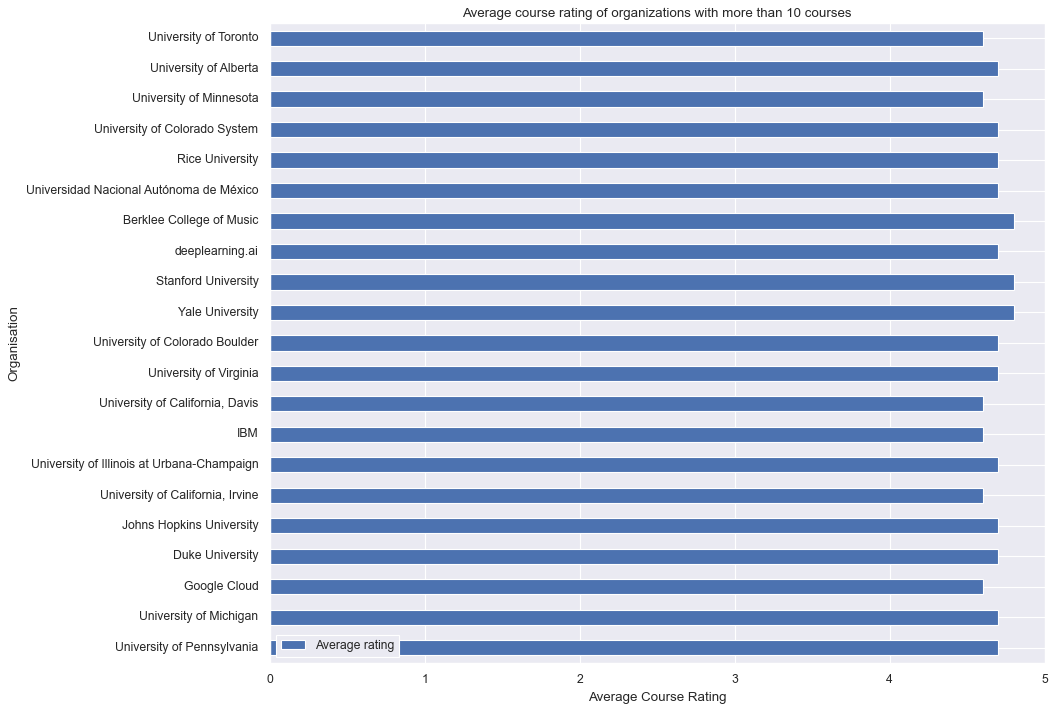

In [49]:
# Plotting a barh chart
course_organisation_greater_than_10.plot(kind='barh', x='course_organization', y='avg_rating')
plt.title('Average course rating of organizations with more than 10 courses')
plt.xlabel('Average Course Rating')
plt.ylabel('Organisation')
plt.legend(['Average rating'], loc='lower left')
plt.show()

<em> As we see there is very little difference between the average course rating of all these organisations. Hence, they don't focus on just quantity. </em>

### Which organisation has the highest course rating?

Grouping by course ratings of all organisations

In [50]:
dominant_dict = round(coursera_data.groupby('course_organization')['course_rating'].mean(), 1).to_dict()
dominant_dict = {k: v for k, v in sorted(dominant_dict.items(), key=lambda item: item[1], reverse=True)}
dominant_dict

{'Crece con Google': 4.9,
 'Google - Spectrum Sharing': 4.9,
 'Hebrew University of Jerusalem': 4.9,
 'London Business School': 4.9,
 'Nanyang Technological University, Singapore': 4.9,
 'ScrumTrek': 4.9,
 'Universidade Estadual de Campinas': 4.9,
 'Universidade de São Paulo': 4.9,
 'American Museum of Natural History': 4.8,
 'Arizona State University': 4.8,
 'Atlassian': 4.8,
 'Autodesk': 4.8,
 'BCG': 4.8,
 'Berklee College of Music': 4.8,
 'Cloudera': 4.8,
 'Columbia University': 4.8,
 'ESADE Business and Law School': 4.8,
 'Eindhoven University of Technology': 4.8,
 'Institute for the Future': 4.8,
 'Kalshoven-Gieskes Forum': 4.8,
 'Ludwig-Maximilians-Universität München (LMU)': 4.8,
 'Macquarie University': 4.8,
 'McMaster University': 4.8,
 'Osmosis': 4.8,
 'Peking University': 4.8,
 'Relay Graduate School of Education': 4.8,
 'SAS': 4.8,
 'Shanghai Jiao Tong University': 4.8,
 'Stanford University': 4.8,
 'Tel Aviv University': 4.8,
 'The George Washington University': 4.8,
 'The

In [51]:
for key, value in dominant_dict.items():
    if value == 4.9:
        print(key)

Crece con Google
Google - Spectrum Sharing
Hebrew University of Jerusalem
London Business School
Nanyang Technological University, Singapore
ScrumTrek
Universidade Estadual de Campinas
Universidade de São Paulo


<em> As you can see none of these organisations belong to the group who have more than 10 courses. </em>

### Number of courses with different ratings

<p> In the below cell we plot a seaborn countplot to see the count of courses versus different course ratings </p>

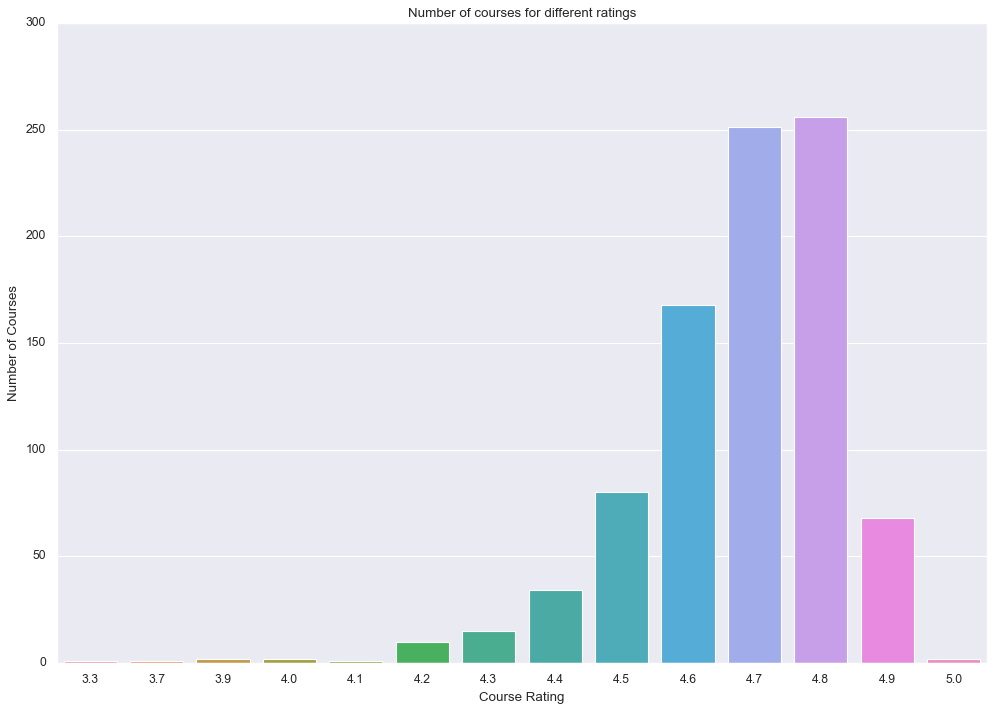

In [52]:
plt.figure(figsize=(15,10)) 
# sns.set_style(style='white') 
sns.countplot(x='course_rating', data=coursera_data)
plt.xlabel('Course Rating')
plt.ylabel('Number of Courses')
plt.title('Number of courses for different ratings');

### Courses on Coursera
<p> Let's look at all the courses with respect to their ratings (first output cell) where we group courses by ratings and return values in descending order. </p>
<p> In the second output cell we print out the top 10 courses on Coursera by course rating. </p>

In [29]:
course_dict = coursera_data.groupby('course_title')['course_rating'].mean().to_dict()
course_dict = {k: v for k, v in sorted(course_dict.items(), key=lambda item: item[1], reverse=True)}
course_dict

{'El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho': 5.0,
 'Infectious Disease Modelling': 5.0,
 'Agile и Scrum в работе над проектами и продуктами': 4.9,
 'American Contract Law I': 4.9,
 'Aprendiendo a aprender: Poderosas herramientas mentales con las que podrás dominar temas difíciles (Learning How to Learn)': 4.9,
 'Arizona State University TESOL': 4.9,
 'Aspectos básicos de la planificación y la gestión de proyectos': 4.9,
 'Become a CBRS Certified Professional Installer by Google': 4.9,
 'Boosting Creativity for Innovation': 4.9,
 'Brand Management: Aligning Business, Brand and Behaviour': 4.9,
 'Bugs 101: Insect-Human Interactions': 4.9,
 'Build a Modern Computer from First Principles: From Nand to Tetris (Project-Centered Course)': 4.9,
 'COVID-19 Contact Tracing': 4.9,
 'Compassionate Leadership Through Service Learning with Jane Goodall and Roots & Shoots': 4.9,
 'Convolutional Neural Networks': 4.9,
 'Discrete Optimization': 4.9,
 'Diseño y Creación d

In [30]:
course_df = pd.DataFrame({'course_title':list(course_dict.keys()), 'course_rating':list(course_dict.values())})
course_df[:10]

,course_title,course_rating
0,El Abogado del Futuro: Legaltech y la Transfor...,5.0
1,Infectious Disease Modelling,5.0
2,Agile и Scrum в работе над проектами и продуктами,4.9
3,American Contract Law I,4.9
4,Aprendiendo a aprender: Poderosas herramientas...,4.9
5,Arizona State University TESOL,4.9
6,Aspectos básicos de la planificación y la gest...,4.9
7,Become a CBRS Certified Professional Installer...,4.9
8,Boosting Creativity for Innovation,4.9
9,"Brand Management: Aligning Business, Brand and...",4.9


### Does course difficulty affect number of students enrolled?
<p> For the following analysis we will check the total and average number of students enrolled while grouping by course difficulties. </p>

In [56]:
# Finding the total number of students enrolled for each course with respect to its difficulty

df = pd.DataFrame({'total_students_enrolled' : coursera_data.groupby('course_difficulty').sum()['course_students_enrolled']}).reset_index()

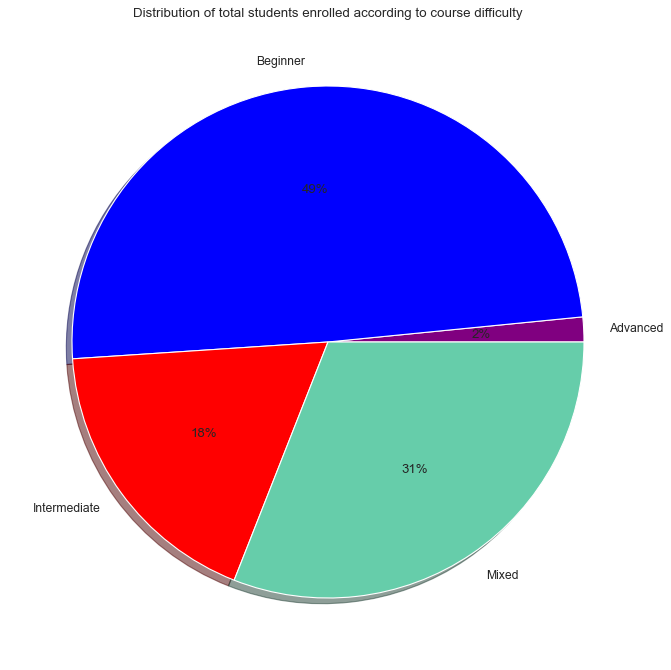

In [57]:
my_colors = ['purple','blue','red','mediumaquamarine']
plt.pie(df['total_students_enrolled'],labels=df['course_difficulty'],autopct='%1.0f%%',shadow = True, colors=my_colors)
plt.title('Distribution of total students enrolled according to course difficulty')
plt.show();

<p> Below is an interactive sunburst plot that shows all courses with repective "Course difficulty", "Organisation", "Difficulty/Organisation" and "Course rating" grouped by their difficulties. </p>

In [113]:
import plotly.express as px
fig = px.sunburst(coursera_data, path=['course_difficulty', 'course_organization'],values='course_rating',
                 labels={
                     "parent": "Course difficulty",
                     "labels": "Organisation",
                     "id": "Difficulty/Organisation",
                     "course_rating": "Course rating"
                 })
fig.show()

<p> Below we find the mean (average) of total students enrolled for each course difficulty. </p>

In [114]:
# Group the mean of total students by course difficulty, sort and print the new assignement
average_student_dict = round(coursera_data.groupby('course_difficulty')['course_students_enrolled'].mean(), 0).to_dict()
average_student_dict = {k: v for k, v in sorted(average_student_dict.items(), key=lambda item: item[1], reverse=True)}
average_student_dict

{'Mixed': 133633.0,
 'Beginner': 81975.0,
 'Intermediate': 73264.0,
 'Advanced': 66547.0}

In [115]:
#Creating a nice Dataframe of averages and preparing for plotting
average_students = pd.DataFrame({'difficulty':list(average_student_dict.keys()), 'avg_students':list(average_student_dict.values())})
average_students

,difficulty,avg_students
0,Mixed,133633.0
1,Beginner,81975.0
2,Intermediate,73264.0
3,Advanced,66547.0


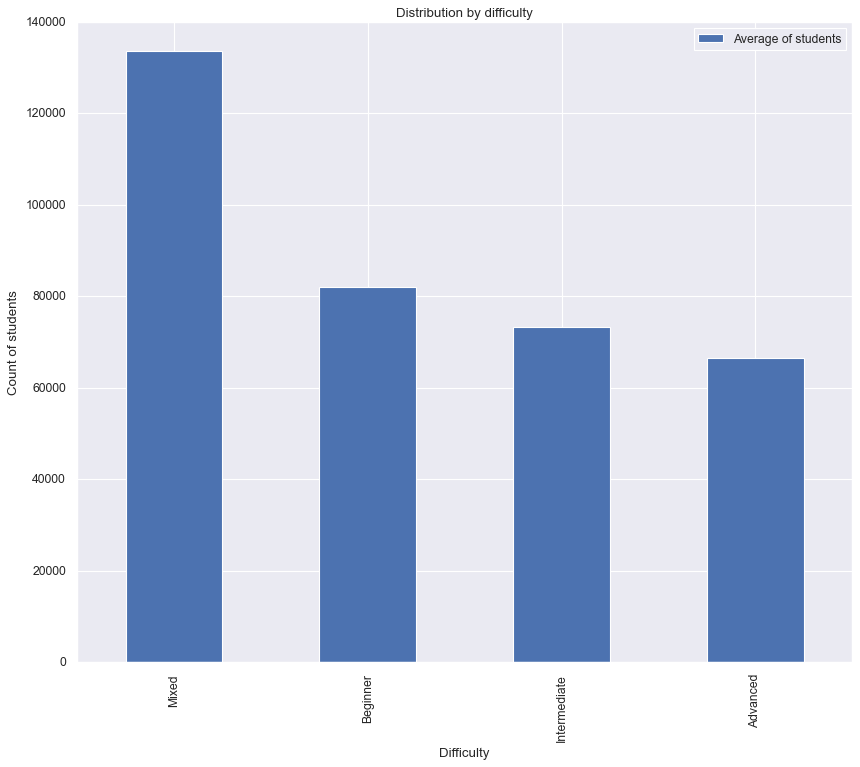

In [116]:
average_students.plot(kind='bar', x='difficulty', y='avg_students', title='Distribution by difficulty')
# plt.style.use('classic')
plt.title('Distribution by difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Count of students')
plt.legend(['Average of students'], loc='upper right')
plt.show()

<em> There are more number of students enrolled per mixed difficulty level course rather than beginner or any other. </em>

## Course distributions
<p> Now we will check the difficulty & certification types versus counts of courses and will look what words attract a user to enroll in the course. </p>

<p> In the below cell we plot a countplot to look how many courses there are on the respective course difficulties. </p> 

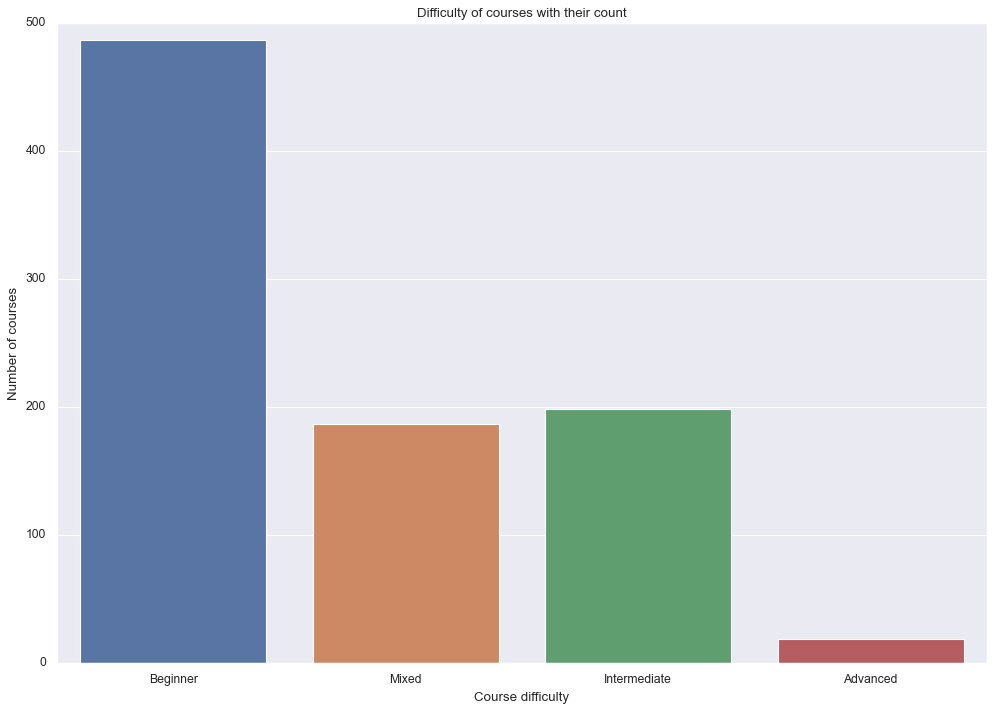

In [117]:
plt.figure(figsize=(15,10)) 
sns.countplot(x='course_difficulty', data=coursera_data)
plt.xlabel('Course difficulty')
plt.ylabel('Number of courses')
plt.title("Difficulty of courses with their count");

# Alternative way:
# fig_dims = (10,6)
# fig,ax = plt.subplots(figsize=fig_dims)
# sns.countplot(x='course_difficulty',data = coursera_data,ax=ax);

<p> In the below cell plotting sublots of certification types and course difficulties versus counts of courses </p>

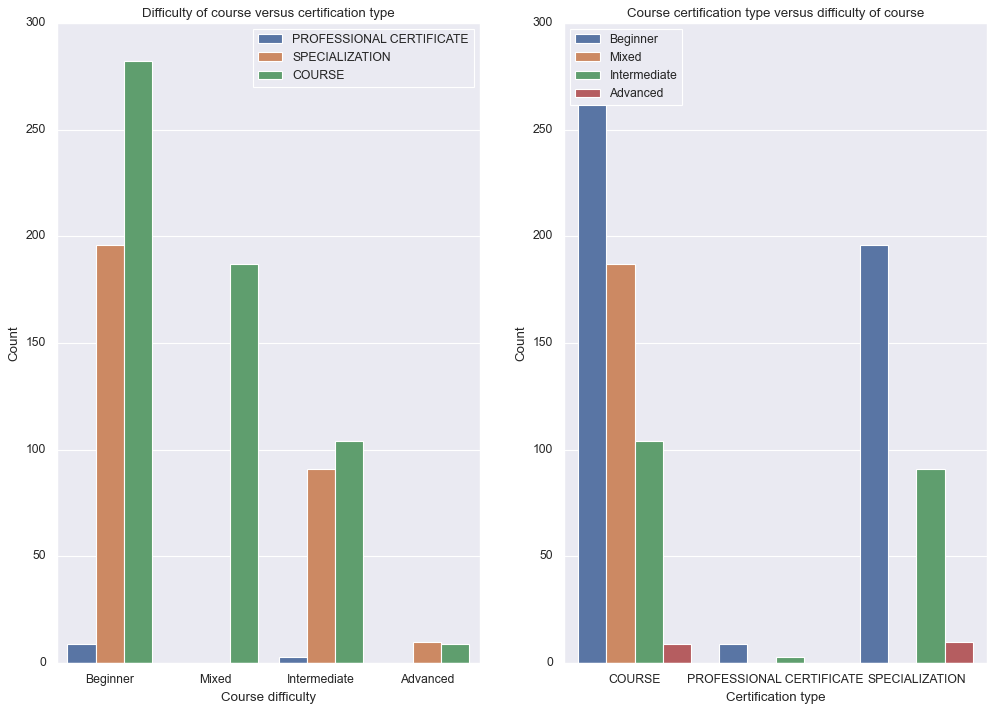

In [118]:
figure, ax = plt.subplots(1, 2, figsize= (15,10))

sns.countplot(coursera_data['course_difficulty'], ax=ax[0], hue=coursera_data['course_Certificate_type'])
ax[0].set_title("Difficulty of course versus certification type")
ax[0].legend(loc=1) 
ax[0].set(xlabel='Course difficulty', ylabel='Count')

coursera = coursera_data.sort_values('course_Certificate_type', axis=0, ascending=True)
sns.countplot(coursera['course_Certificate_type'], ax=ax[1], hue=coursera_data['course_difficulty'])
ax[1].set_title("Course certification type versus difficulty of course")
ax[1].legend(loc=2)
ax[1].set(xlabel='Certification type', ylabel='Count')

figure.show;

<p> The below cell shows a plot of the total number of courses versus course ratings with each rating showing how many courses vary along course difficulties. </p>

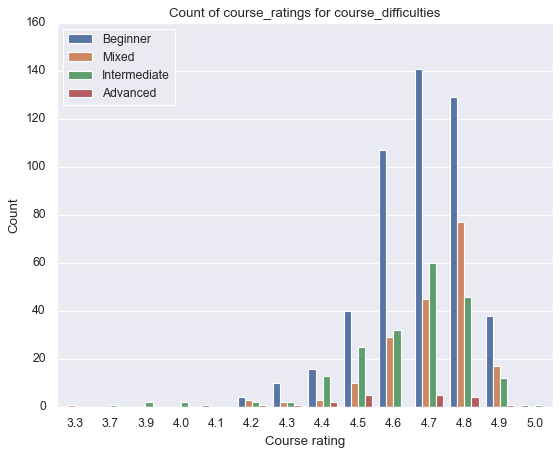

In [119]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=coursera_data,x = 'course_rating',hue= 'course_difficulty',ax=ax)
ax.legend(loc=2)
ax.set(xlabel='Course rating', ylabel='Count')

plt.title('Count of course_ratings for course_difficulties');

<p> The below cell gives an interactive plot showing all courses of all organizations with repect to the course difficulties. </p> 
<p> When you press on a dot you are given Course difficulty, Organisation, Course title and Course rating. </p>

In [120]:
fig = px.scatter(coursera_data, x="course_difficulty", y="course_organization", 
                 color="course_rating", 
                 labels={
                     "course_difficulty": "Course difficulty",
                     "course_organization": "Organisation",
                     "course_title": "Course title",
                     "course_rating": "Course rating"
                 },
                 hover_data=['course_title', 'course_rating'])
fig.show()

Below is the word cloud that shows what words attract a student to enroll in the course.

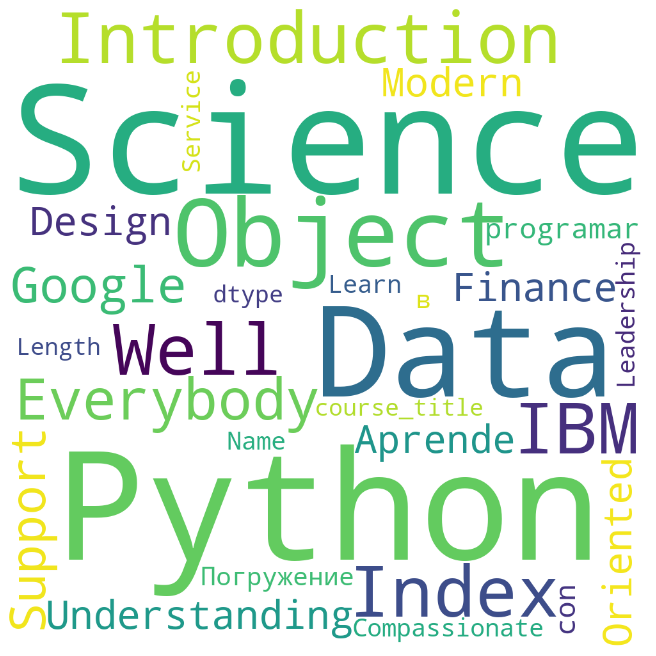

In [121]:
wordcloud = WordCloud(width = 1000, height = 1000, 
            background_color ='white', 
            stopwords = STOPWORDS, 
            min_font_size = 10).generate(str(coursera_data['course_title']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Does course difficulty affect rating?
<p> Do courses with advanced level of difficulty get lower rating? Is there any relation between the two? </p>
<p> Below cell groups the course difficulties by course ratings and takes the mean. </p>

In [122]:
rate_dict = round(coursera_data.groupby('course_difficulty')['course_rating'].mean(), 1).to_dict()
rate_dict = {k: v for k, v in sorted(rate_dict.items(), key=lambda item: item[1], reverse=True)}
rate_dict

{'Beginner': 4.7, 'Mixed': 4.7, 'Advanced': 4.6, 'Intermediate': 4.6}

<p> Below cell plots a plot to look at an average rating by course difficulties. </p>

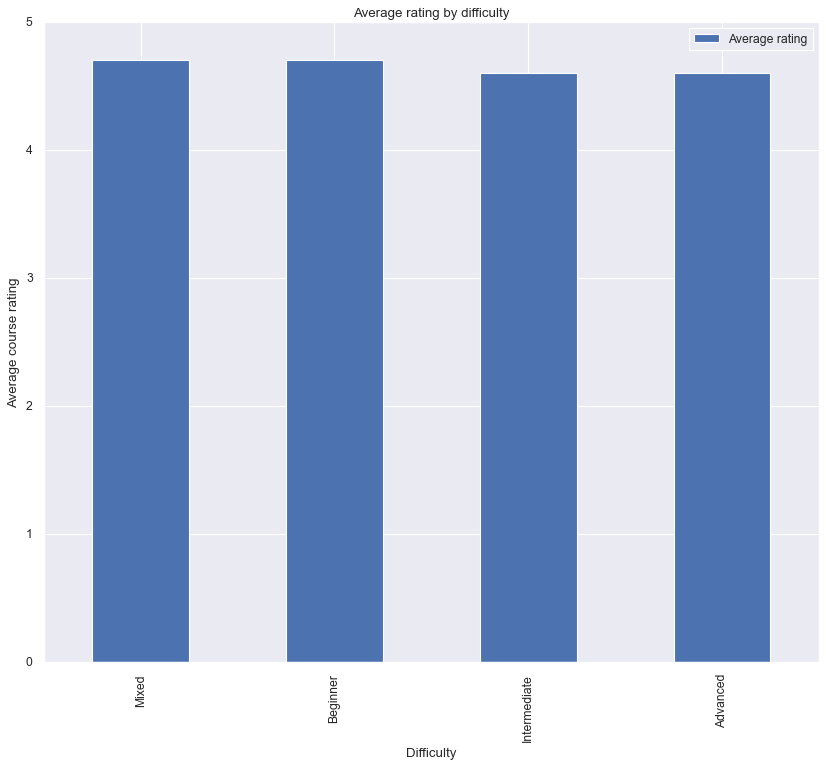

In [126]:
diff_stud['avg_rating'] = list(rate_dict.values())
diff_stud.plot(kind='bar', x='difficulty', y='avg_rating', title='Average rating by difficulty')
# plt.style.use('classic')
plt.title('Average rating by difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Average course rating')
plt.legend(['Average rating'], loc='upper right')
plt.show();

<em> Nope, very little difference in the ratings. </em>

### Does certificate type impact number of students enrolled?
<p> This could be a very important question for Coursera and for the organisations who are making courses. </p>
What type of certificate should be there for the maximum student enrollment and how should Coursera optimize the course recommendations based on the type of certificates? </em>

In [127]:
certificate_dict = round(coursera_data.groupby('course_Certificate_type')['course_students_enrolled'].mean(), 0).to_dict()
certificate_dict = {k: v for k, v in sorted(certificate_dict.items(), key=lambda item: item[1], reverse=True)}
certificate_dict

{'PROFESSIONAL CERTIFICATE': 190700.0,
 'SPECIALIZATION': 91792.0,
 'COURSE': 87854.0}

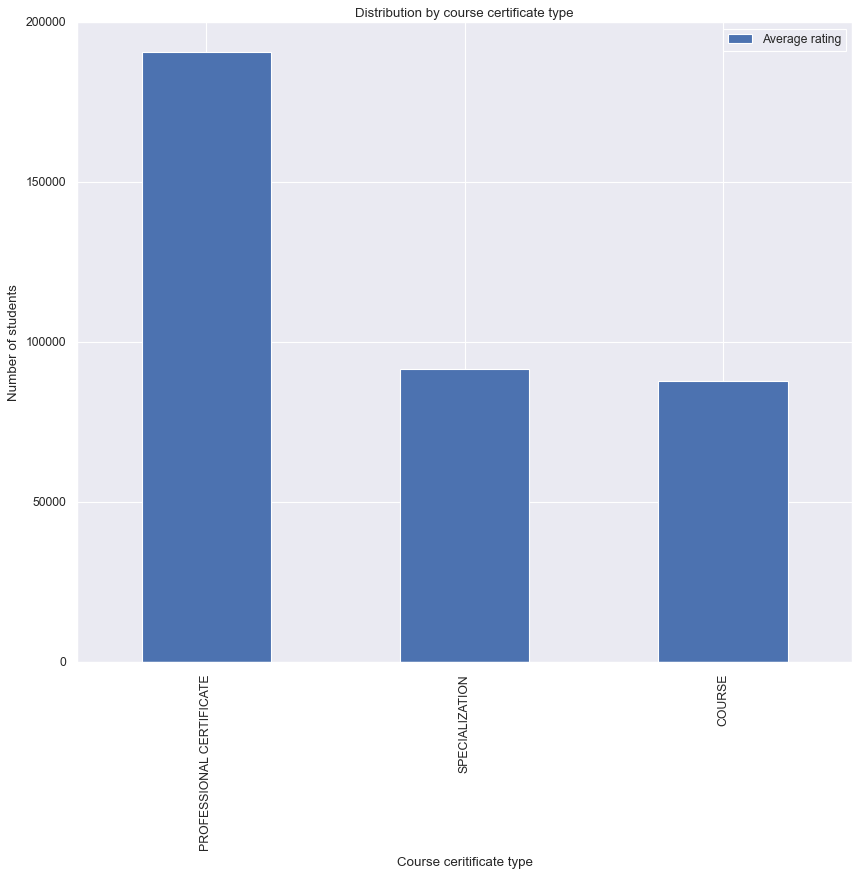

In [129]:
certificate_df = pd.DataFrame({'course_Certificate_type':list(certificate_dict.keys()), 'avg_students':list(certificate_dict.values())})
certificate_df.plot(kind='bar', x='course_Certificate_type', y='avg_students', title='Distribution by course certificate type')
plt.title('Distribution by course certificate type')
plt.xlabel('Course ceritificate type')
plt.ylabel('Number of students')
plt.legend(['Average rating'], loc='upper right')
plt.show();

Yes! More number of students on an average enroll in Professional Certificate courses followed by a specialization.

### Courses distribution

How many courses are there provided by the Coursera in general compared to the ones that give only specializations or professional certificates?

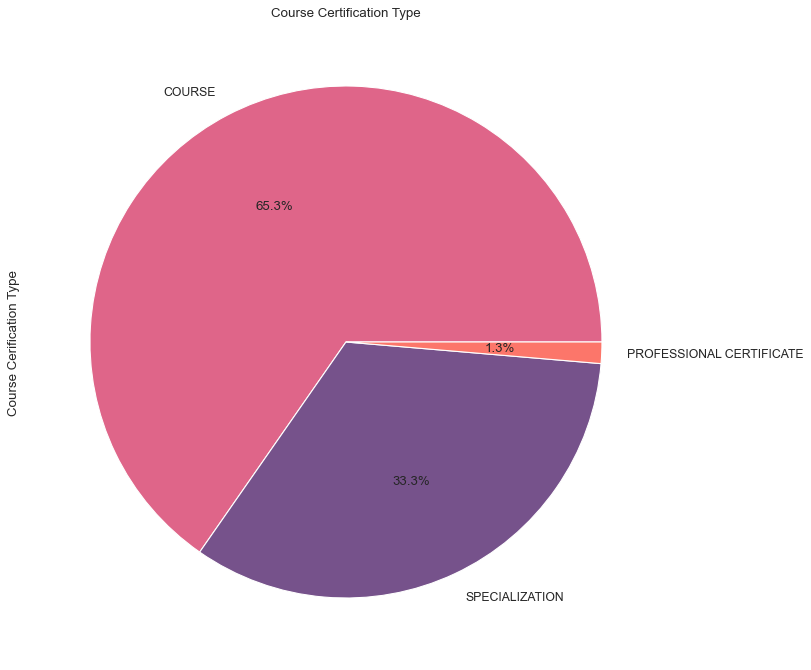

In [130]:
colors =  ["#DF6589FF", "#76528BFF","#FC766AFF"]
ax= coursera_data['course_Certificate_type'].value_counts(ascending=False).plot.pie(colors=colors,
            autopct='%1.1f%%',
            figsize=(15, 10))
plt.title('Course Certification Type') 
plt.ylabel('Course Cerification Type')
plt.show();

<em> It seems that there are more courses provided by the Coursera than there are courses for professional certificates, which majority of students take. </em>


### Which courses are the most popular and how many students have enrolled in them?

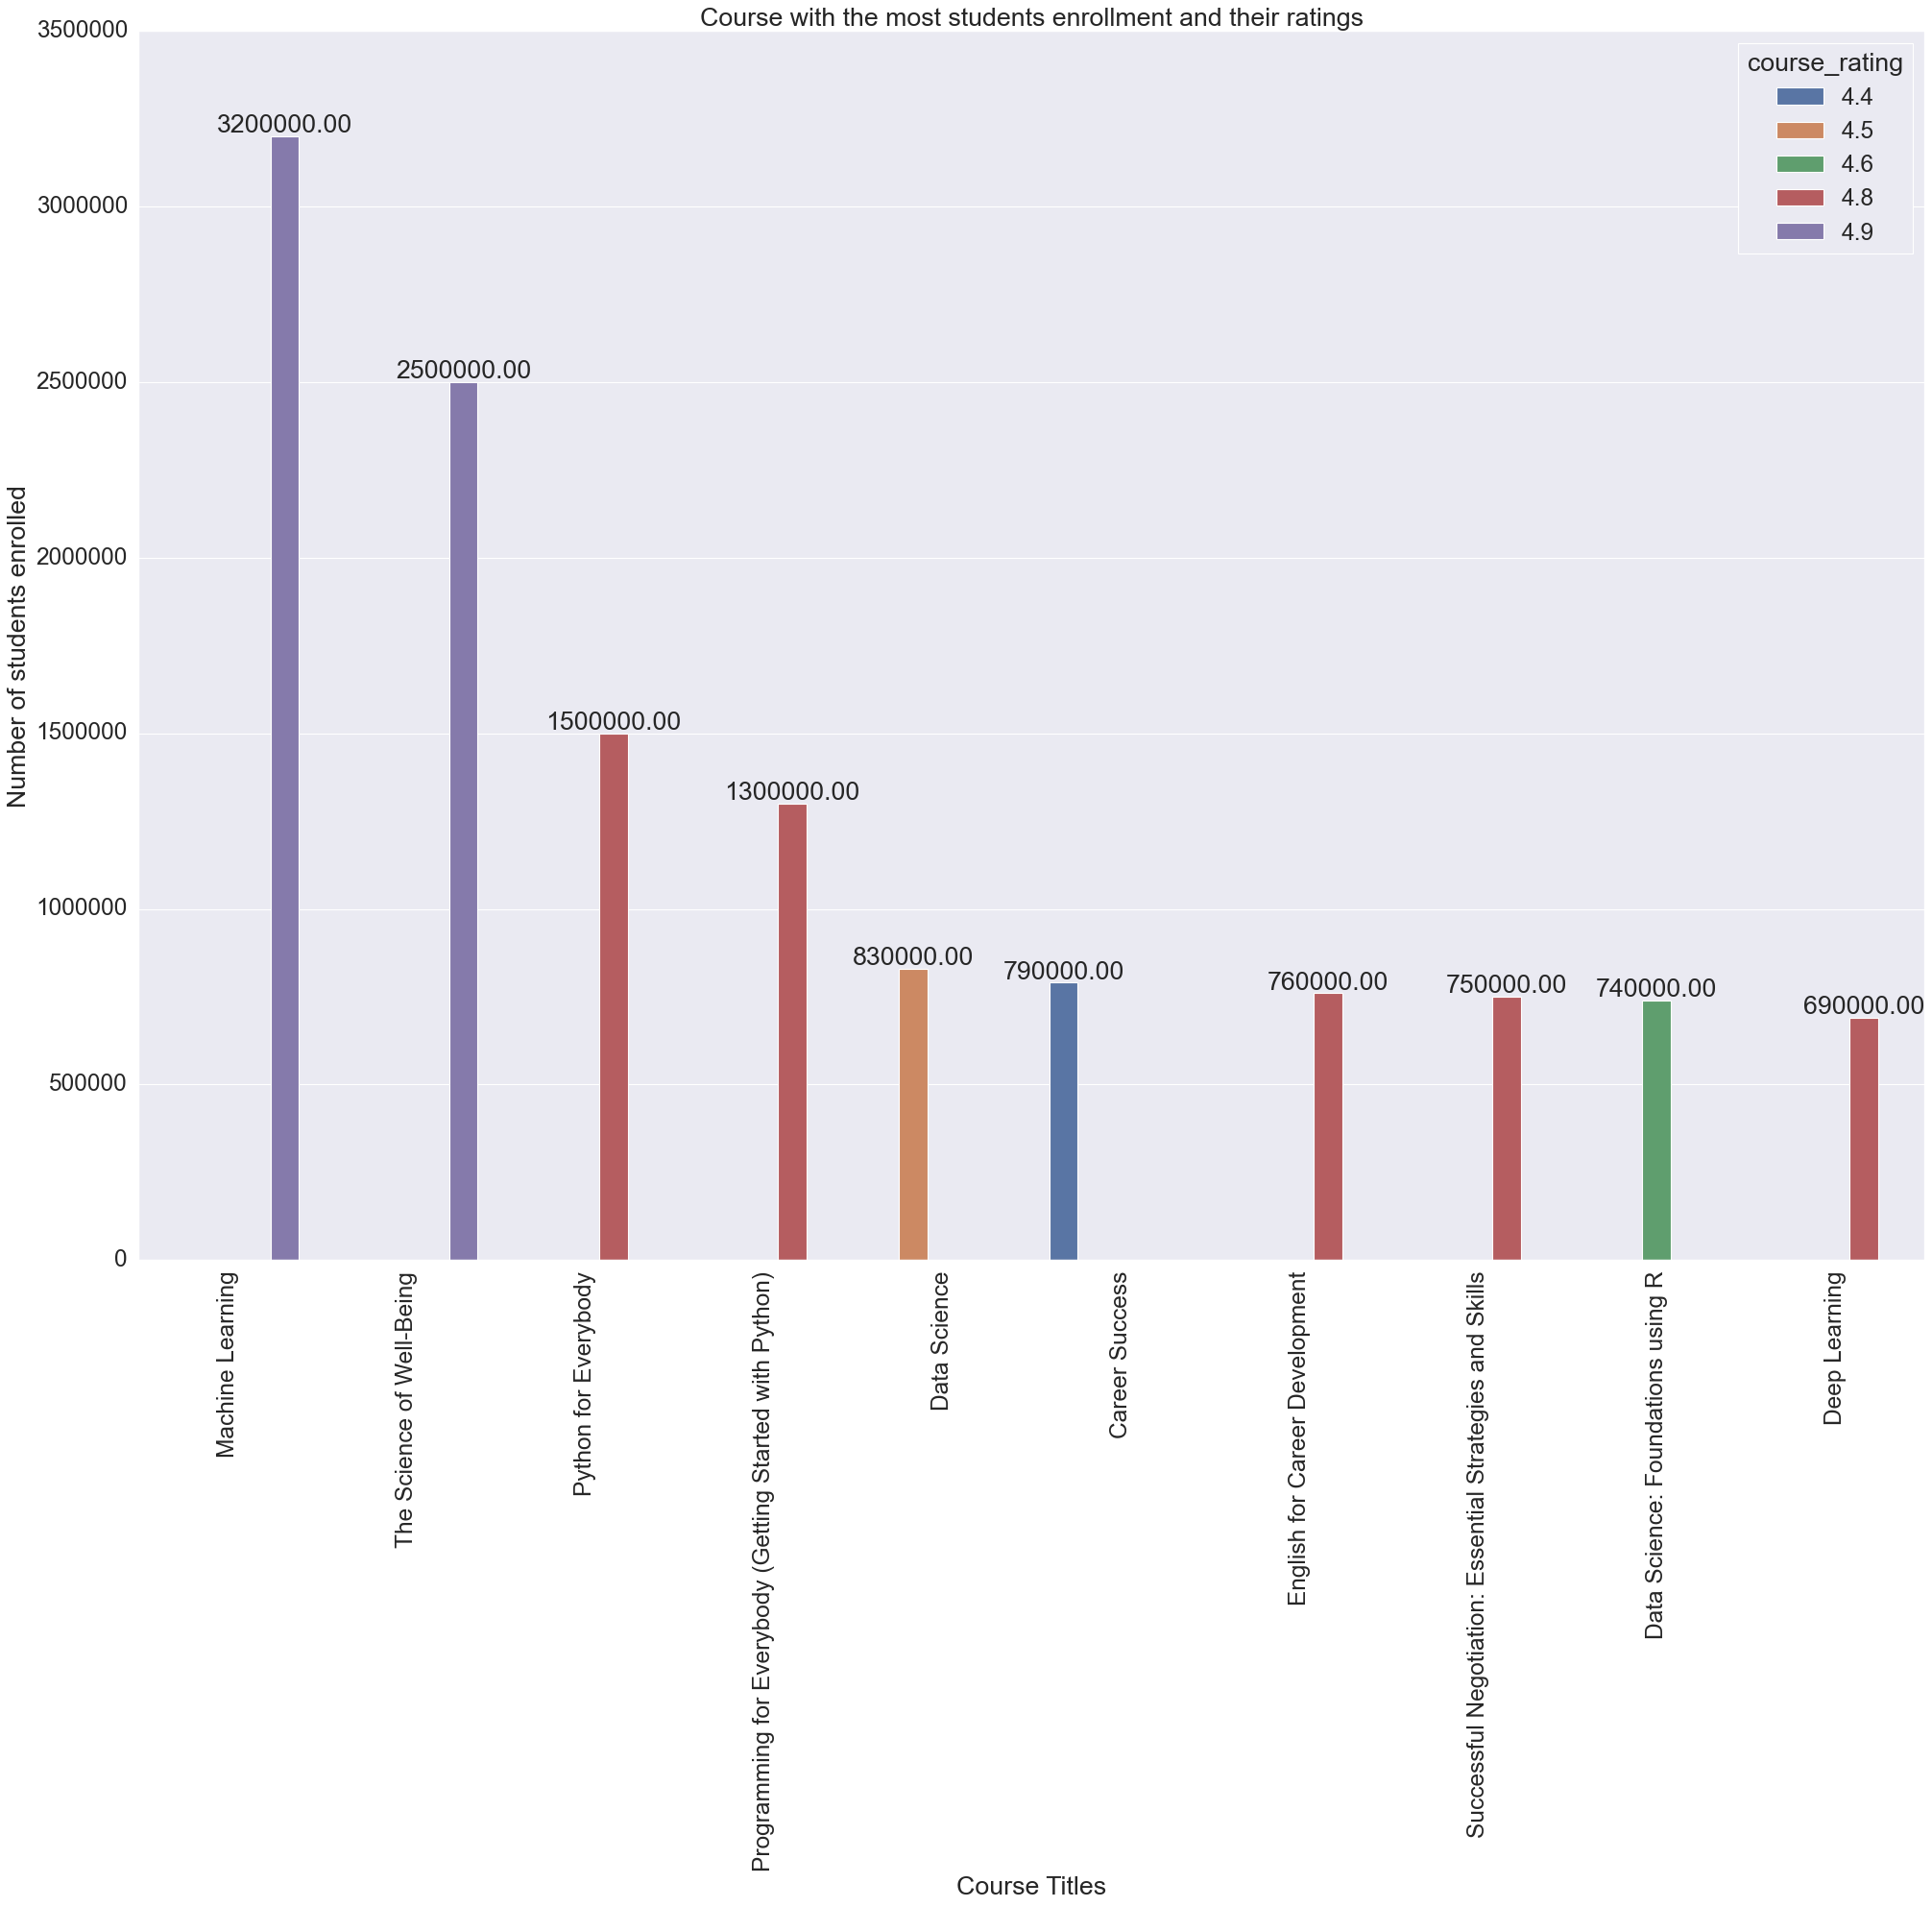

In [133]:
large=coursera_data.nlargest(10, ['course_students_enrolled'])

plt.figure(figsize=(30,20))
# sns.set_style(style='white') 
sns.set(font_scale = 2)
g = sns.barplot(x="course_title" ,y="course_students_enrolled",hue="course_rating",data=large)
plt.xlabel('Course Titles')
plt.xticks(rotation=90)
plt.ylabel('Number of students enrolled')
plt.title("Course with the most students enrollment and their ratings")

for p in g.patches:
    
    g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Does certificate type impact course rating?
Do professional certificates have a higher rating because they are accepted everywhere or is there still no impact?

In [134]:
rate_cert_dict = round(coursera_data.groupby('course_Certificate_type')['course_rating'].mean(), 1).to_dict()
rate_cert_dict = {k: v for k, v in sorted(rate_cert_dict.items(), key=lambda item: item[1], reverse=True)}
rate_cert_dict

{'COURSE': 4.7, 'PROFESSIONAL CERTIFICATE': 4.7, 'SPECIALIZATION': 4.6}

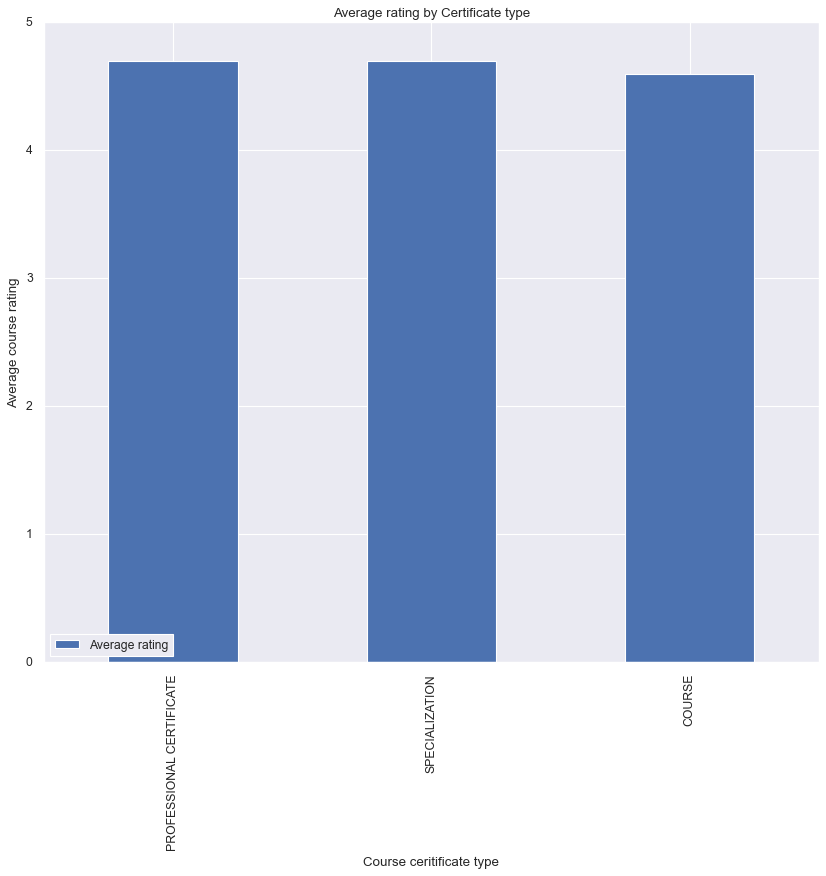

In [136]:
cert_df['avg_rating'] = list(rate_cert_dict.values())
cert_df.plot(kind='bar', x='course_Certificate_type', y='avg_rating', title='Average rating by Certificate type')
sns.set(font_scale = 1)
plt.xlabel('Course ceritificate type')
plt.ylabel('Average course rating')
plt.legend(['Average rating'], loc='lower left')
plt.show();

Still, no difference.

### Number of students enrolled vs. course rating
Last but not the least, if there a large number of students enrolled in the course, does that impact the course rating?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


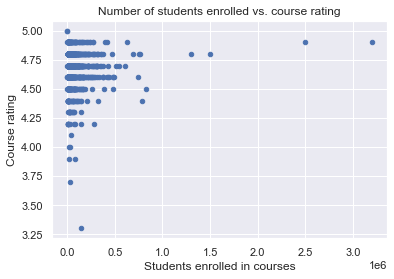

In [48]:
coursera_data.plot(kind='scatter', x='course_students_enrolled', y='course_rating', title='Number of students enrolled vs. course rating')
plt.ylabel('Course rating')
plt.xlabel('Students enrolled in courses')
plt.show()

There is a small datapoint at the bottom which says that less number of students meaning low rating, but this does not prove our assumption as there is no strong relation. We can check how strong is the relation by finding correlation between the two.

In [49]:
coursera_data.corr()

,course_rating,course_students_enrolled
course_rating,1.00000,0.07109
course_students_enrolled,0.07109,1.00000


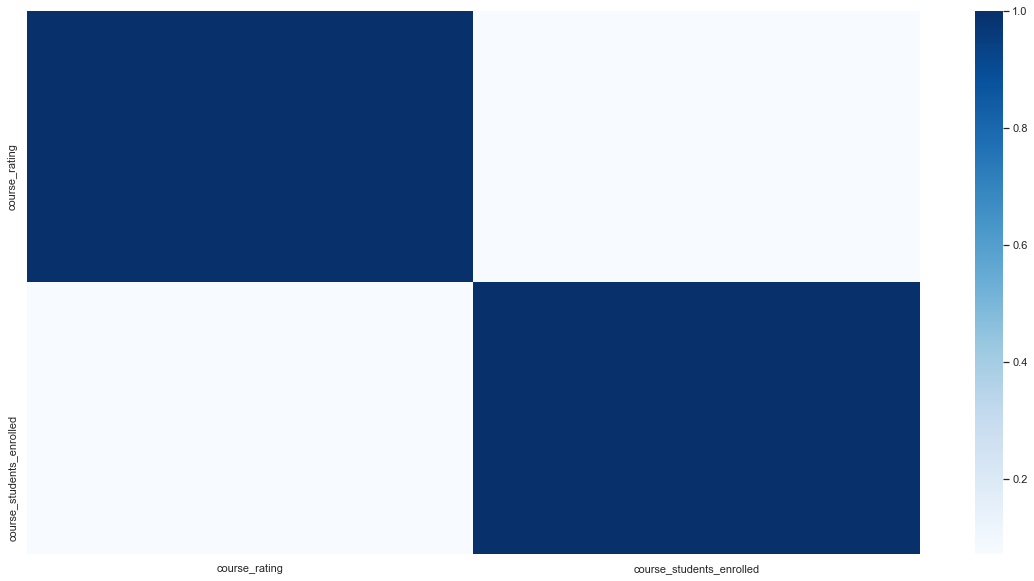

In [25]:
# Checking correlation of data
plt.figure(figsize=(20,10))
sns.heatmap(coursera_data.corr(),cmap='Blues',annot=False);

<em> We see that there is no correlation between two numeric features, hence it's not enough to prove our assumption that more number of students enrolled in the course does lead to a higher rating. </em>

# Improvements
* Use one hot (OHE) encoding to help analyse categorical variables by coverting them to numbers to get correalations. 
* Provide more interactive visualizations after OHE. 
* Import data from other platforms and comparing them all.
* Improve data visualization by comparing with other platforms like edx or udemy. 

# Conclusion

* University of Pennsylvania has most number of courses on Coursera followed by University of Michigan.
* Organizations with more than 10 courses on Coursera are not present in the top 5 organizations list with the highest rating.
* There is no Computer Science course in the top 10 highest rated courses on Coursera.
* Course difficulty does affect the number of students enrolled. There are more students enrolled in Beginner and Mixed level of difficulty courses than Intermediate and Advanced.
* Course difficulty does not affect course rating.
* Course certificate type does impact the number of students enrolled in that course. More number of students tend to enroll for Professional Certificate courses than just "COURSE" certificate.
* Certificate type does not impact course rating.
* There is no strong relation to prove that if more number of students are enrolled in a course, the course rating is a higher.